In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Exploratory analysis of the features

In this notebook, the exploratory analysis of features is performed.

## Reading the dataset

In [4]:
data = pd.read_csv('train.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Features

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There are 891 records of passangers with missing values in `Age`, `Cabin`, and `Embarked`. Let's check the amount of missing values in each of the features:

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Let's also see the the number of unique values in each feature:

In [8]:
pd.DataFrame({
    'Unique values': data.nunique(),
    'Data type': data.dtypes
})

,Unique values,Data type
Survived,2,int64
Pclass,3,int64
Name,891,object
Sex,2,object
Age,88,float64
SibSp,7,int64
Parch,7,int64
Ticket,681,object
Fare,248,float64
Cabin,147,object


There will no `Embarked` in the plot, so we should modify it.

In [9]:
plot_data = data.copy()
plot_data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [10]:
plot_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
plot_data['Embarked'] = plot_data['Embarked'].astype('category').cat.codes

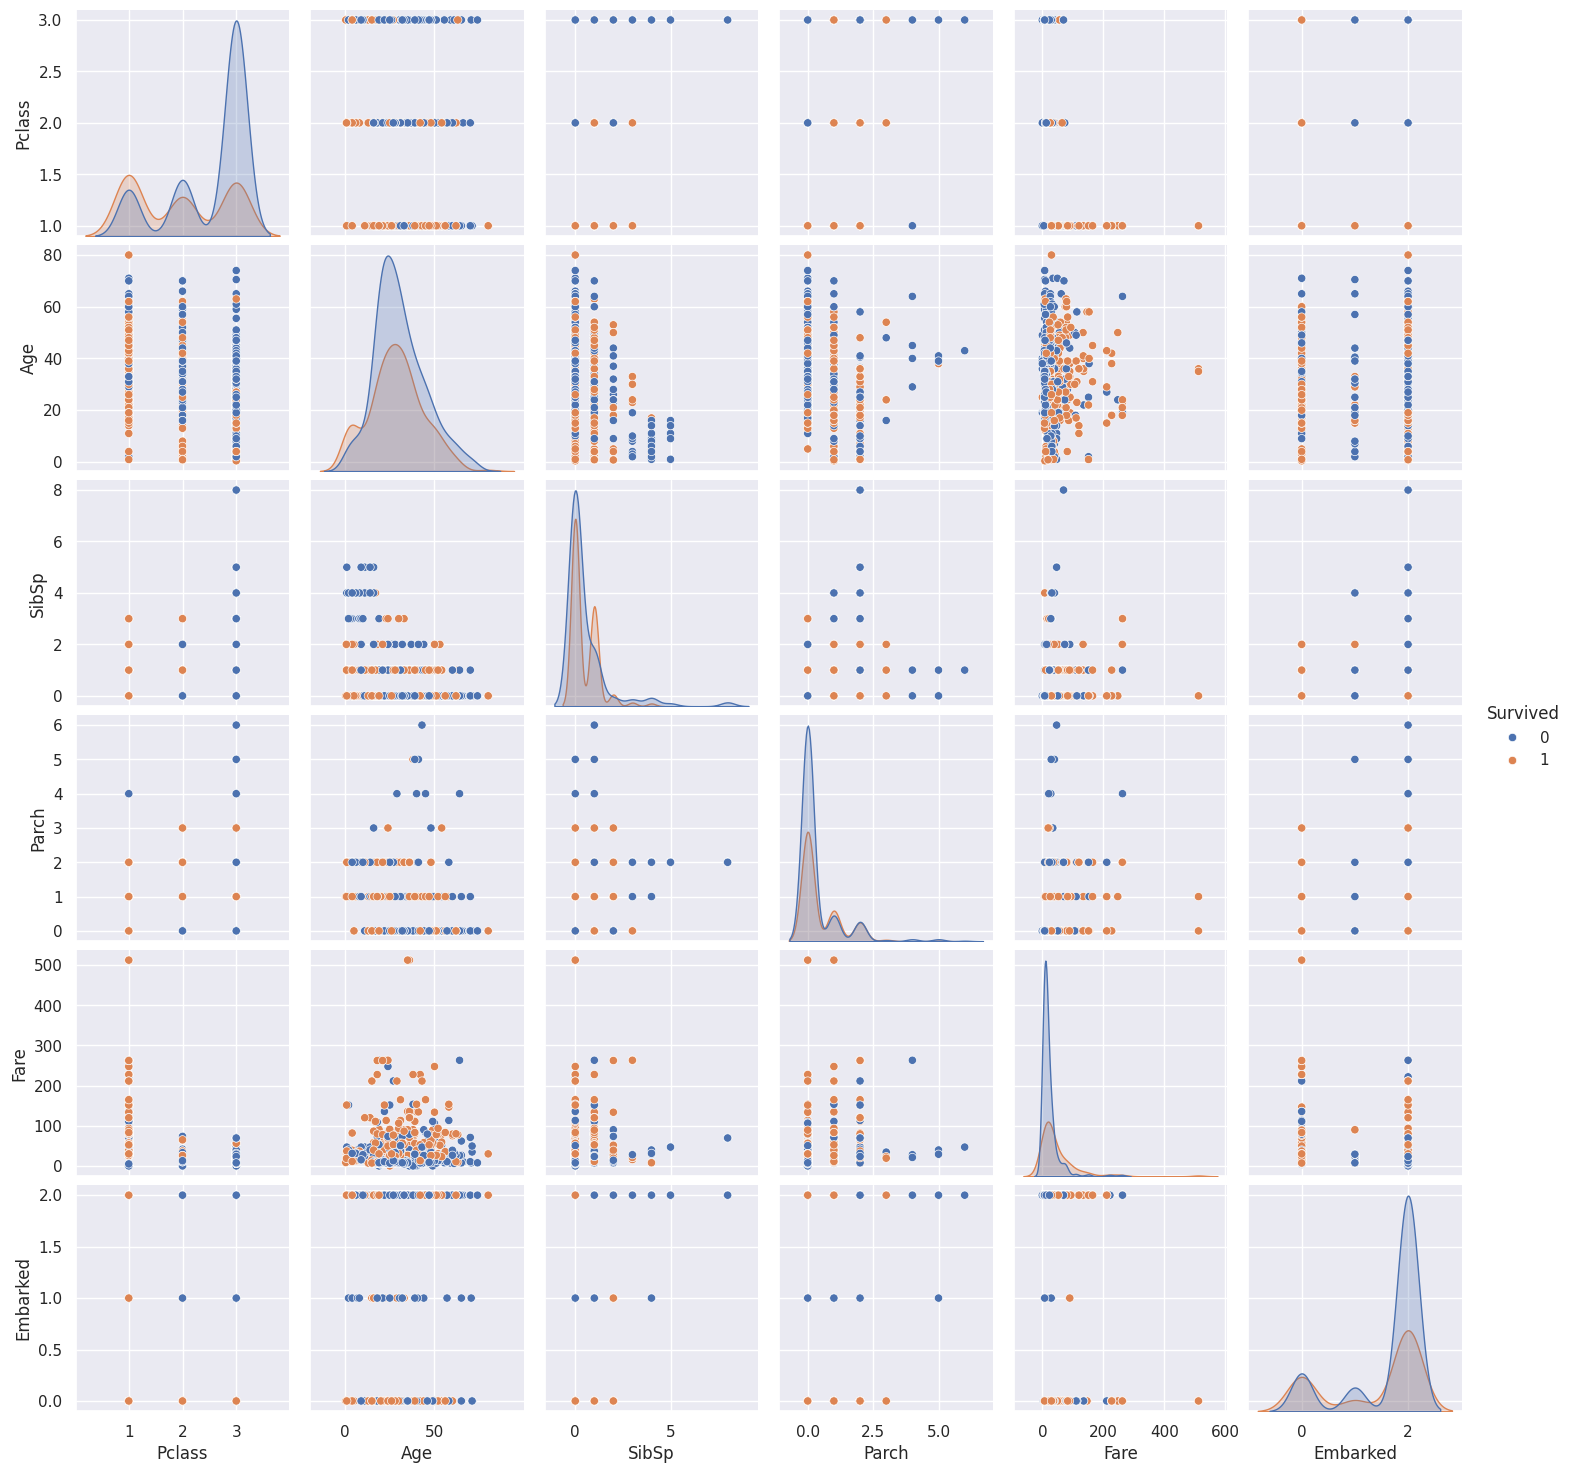

In [12]:
sns.pairplot(plot_data, hue='Survived');

### Distribution of input features

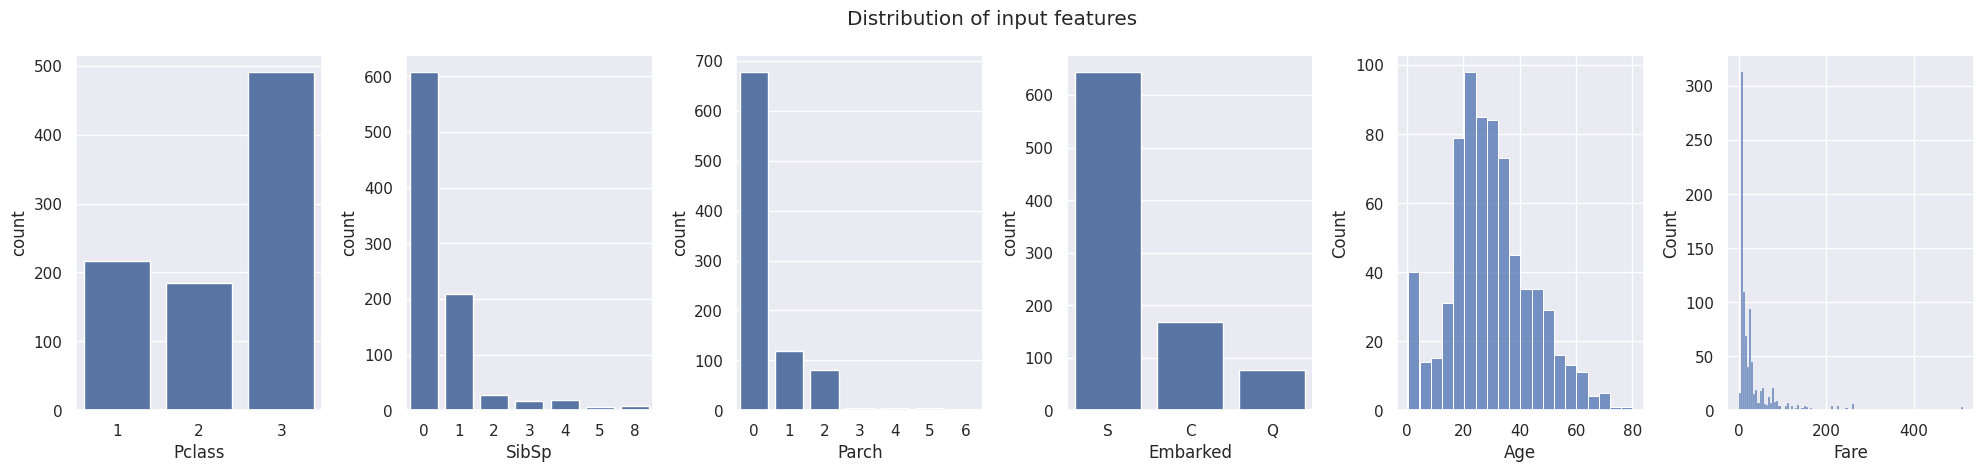

In [13]:
input_features = ['Pclass', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare']
fig, ax = plt.subplots(1, len(input_features))
fig.set_figwidth(20)

for i, feature in enumerate(input_features[:-2]):
    sns.countplot(data=data, x=feature, ax=ax[i])

for i, feature in enumerate(input_features[-2:]):
    sns.histplot(data=data, x=feature, ax=ax[i + len(input_features[:-2])])

fig.suptitle('Distribution of input features')
fig.set_tight_layout(tight='tight')

### Distribution of the target

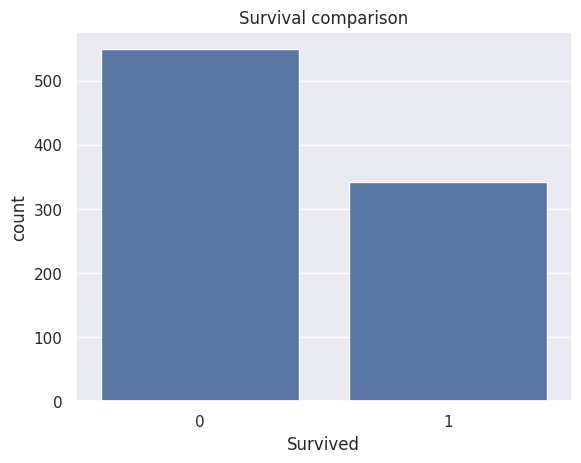

In [14]:
plt.title('Survival comparison')
sns.countplot(data=data, x='Survived');

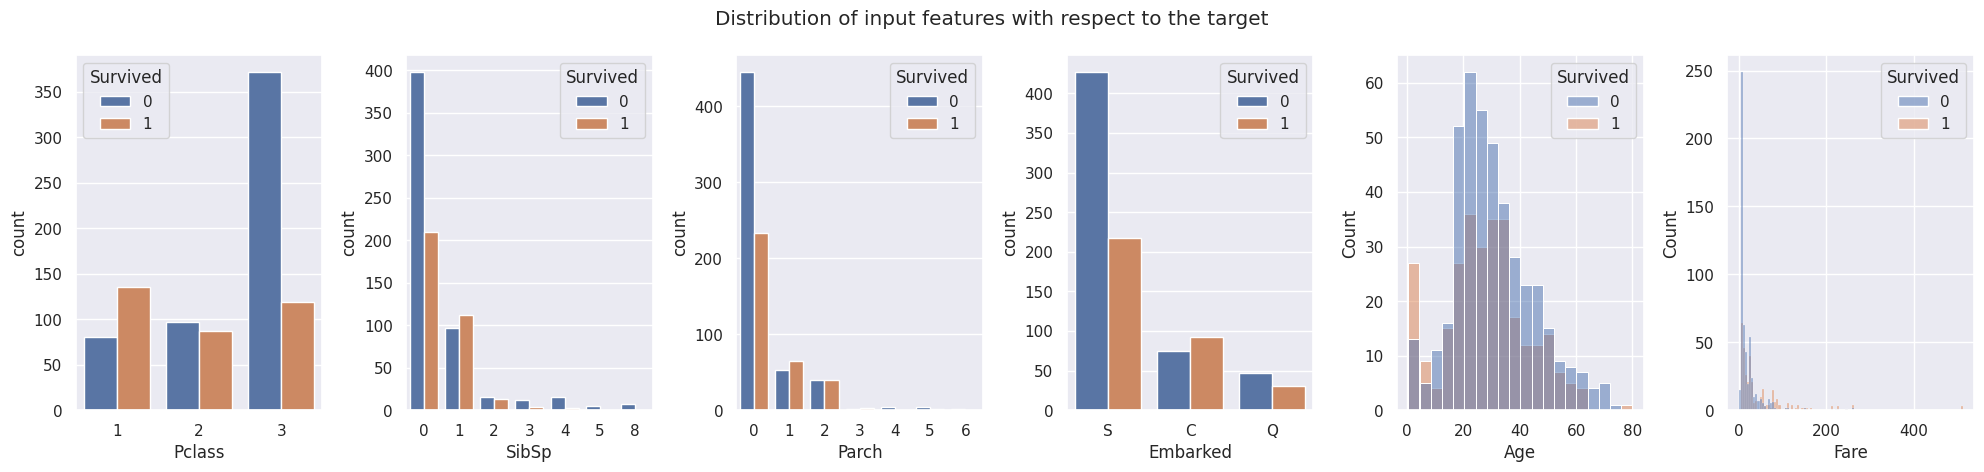

In [15]:
input_features = ['Pclass', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare']
fig, ax = plt.subplots(1, len(input_features))
fig.set_figwidth(20)

for i, feature in enumerate(input_features[:-2]):
    sns.countplot(data=data, x=feature, ax=ax[i], hue='Survived')

for i, feature in enumerate(input_features[-2:]):
    sns.histplot(data=data, x=feature, ax=ax[i + len(input_features[:-2])], hue='Survived')

fig.suptitle('Distribution of input features with respect to the target')
fig.set_tight_layout(tight='tight')

### Interesting insights in data

#### Deck label

In [16]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In the titanic dataset, a letter in a number of a cabin denotes the deck of the ship. If the deck is `A`, then it is right on the top of the ship, whereas `F` is the lowest. Unfortunately, we have a lot of missing values, but we still can analyze that.

In [17]:
def extract_deck(x):
    if pd.isna(x):
        return 'N'
    else:
        return str(x)[0]

decks = data['Cabin'].apply(extract_deck)
decks.unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [18]:
pd.DataFrame({
    'cabin': data['Cabin'], 'extracted': decks
})

,cabin,extracted
PassengerId,,
1,NaN,N
2,C85,C
3,NaN,N
4,C123,C
5,NaN,N
...,...,...
887,NaN,N
888,B42,B
889,NaN,N


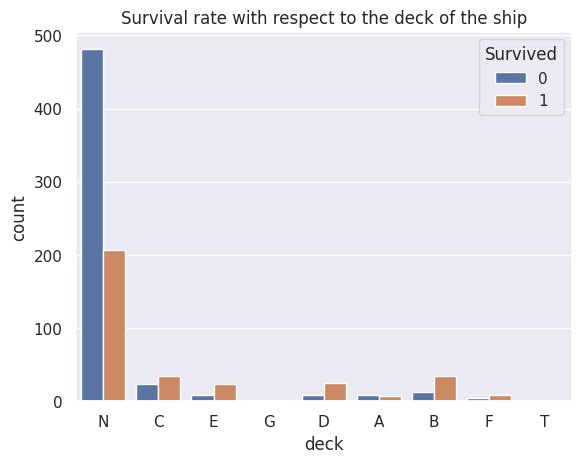

In [19]:
plot_data = pd.DataFrame({
    'deck': decks, 'Survived': data['Survived']
})

plt.title('Survival rate with respect to the deck of the ship')
sns.countplot(data=plot_data, x='deck', hue='Survived');

#### Title of a person

In [20]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
def extract_title(x):
    return x.split(', ')[1].split('.')[0]

titles = data['Name'].apply(extract_title)
titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

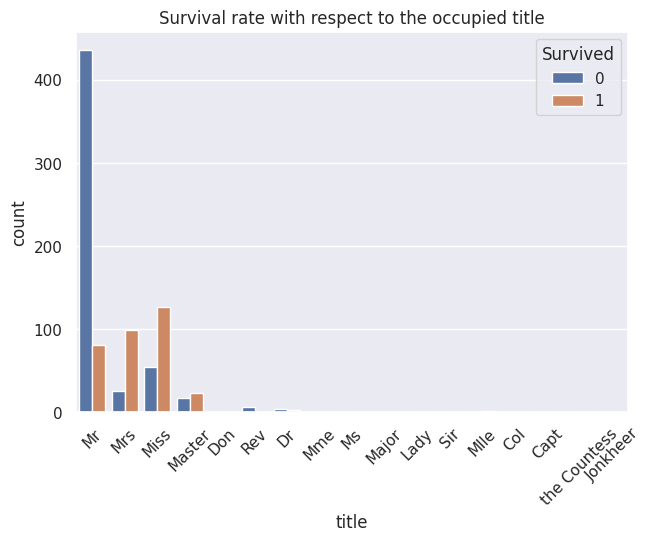

In [22]:
plot_data = pd.DataFrame({
    'title': titles, 'Survived': data['Survived']
})

plt.title('Survival rate with respect to the occupied title')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
sns.countplot(data=plot_data, x='title', hue='Survived');

In [23]:
titles.value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [24]:
threshold = 8
counts = titles.value_counts()
titles_modified = titles.apply(lambda x: 'Rare' if counts[x] < threshold else x)

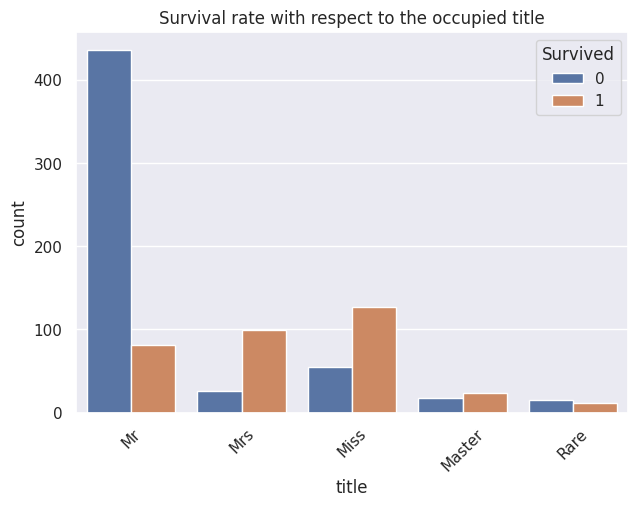

In [25]:

plot_data = pd.DataFrame({
    'title': titles_modified, 'Survived': data['Survived']
})

plt.title('Survival rate with respect to the occupied title')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
sns.countplot(data=plot_data, x='title', hue='Survived');

#### Family

##### Family size

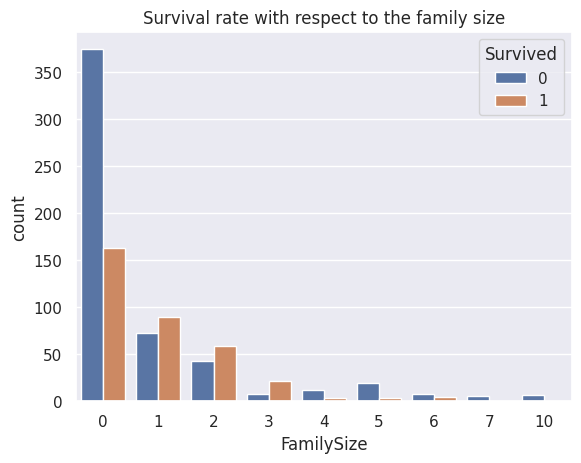

In [26]:
family_sizes = data['Parch'] + data['SibSp']
plot_data = data.copy()
plot_data['FamilySize'] = family_sizes

plt.title('Survival rate with respect to the family size')
sns.countplot(data=plot_data, x='FamilySize', hue='Survived');

##### Loneliness

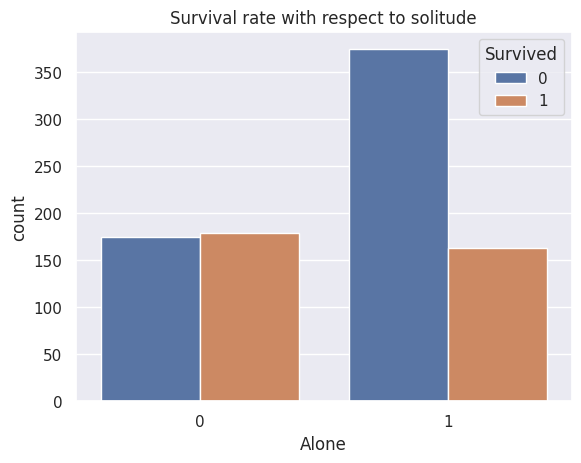

In [27]:
alones = family_sizes.apply(lambda x: 1 if x == 0 else 0)

plot_data = data.copy()
plot_data['Alone'] = alones

plt.title('Survival rate with respect to solitude')
sns.countplot(data=plot_data, x='Alone', hue='Survived');

## Processed dataset

In [29]:
from preprocessing import prepare_dataset

improved_dataset = prepare_dataset(data)
improved_dataset.head()

,Survived,Pclass,Age,Fare,Deck,FamilySize,Alone,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,-0.565736,-0.502445,8,1,False,False,False,True,False,False,True,False,False,False,True
2,1,1,0.663861,0.786845,2,1,False,True,False,False,False,False,False,True,False,True,False
3,1,3,-0.258337,-0.488854,8,0,True,False,False,True,False,True,False,False,False,True,False
4,1,1,0.433312,0.420730,2,1,False,False,False,True,False,False,False,True,False,True,False
5,0,3,0.433312,-0.486337,8,0,True,False,False,True,False,False,True,False,False,False,True


Description of the data:

In [30]:
improved_dataset.describe()

,Survived,Pclass,Age,Fare,Deck,FamilySize
count,891.000000,891.000000,8.910000e+02,8.910000e+02,891.000000,891.000000
mean,0.383838,2.308642,2.272780e-16,3.987333e-18,6.716049,0.904602
std,0.486592,0.836071,1.000562e+00,1.000562e+00,2.460739,1.613459
min,0.000000,1.000000,-2.224156e+00,-6.484217e-01,0.000000,0.000000
25%,0.000000,2.000000,-5.657365e-01,-4.891482e-01,8.000000,0.000000
50%,0.000000,3.000000,-1.046374e-01,-3.573909e-01,8.000000,0.000000
75%,1.000000,3.000000,4.333115e-01,-2.424635e-02,8.000000,1.000000
max,1.000000,3.000000,3.891554e+00,9.667167e+00,8.000000,10.000000
